# Project: Investigate a Dataset - Database_TMDb_movie_data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 



I used TMDb movie data set for data analysis. 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. [From Udacity]


### Question(s) for Analysis

1. Which year has the highest release of movies?
2. What are the 10 top rated movies
3. What are the 10 bad rated movies
4. Revenue over the years
5. Does Popularity Depends On Profit?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Import data file
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

# Show the first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Get shape
df.shape

(10866, 21)

In [4]:
# Get data type of each coloumn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

In [5]:
# Check duplicates in data
df.duplicated()

#to check how many duplicated in such a big file
df.duplicated().sum()

1

In [6]:
# remove the duplicate
df.drop_duplicates(inplace=True)

# check if duplicate is removed expectation entiries - 1
df.duplicated().sum()

0

In [7]:
#check if empty values in release_year, revenue
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#remove unnessecary coloumns (NAN values and not important for me)
not_used_columns=['imdb_id', 'homepage', 'tagline', 'director', 'keywords', 'overview','vote_count', 'release_date', 'production_companies', 'overview']
df.drop(not_used_columns, axis=1, inplace=True)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   cast            10789 non-null  object 
 6   runtime         10865 non-null  int64  
 7   genres          10842 non-null  object 
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
 10  budget_adj      10865 non-null  float64
 11  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
# Remove values with zeroes in it
def filterFunc(data, parameter, value):
    return data[(parameter != value)]

df_filtered = filterFunc(df, df.revenue, 0)
df_filtered = filterFunc(df_filtered, df_filtered.budget, 0)
df_filtered.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
#filtered data shape
df_filtered.shape

(3854, 12)

In [13]:
#unfiltered shape
df.shape

(10865, 12)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Which year has the highest release of movies?

In [14]:
# count movies
data = df.groupby('release_year').count()
data

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,,,
1960,32,32,32,32,32,32,32,32,32,32,32
1961,31,31,31,31,31,31,31,31,31,31,31
1962,32,32,32,32,32,32,32,32,32,32,32
1963,34,34,34,34,34,34,34,34,34,34,34
1964,42,42,42,42,42,42,42,42,42,42,42
1965,35,35,35,35,35,35,35,35,35,35,35
1966,46,46,46,46,46,46,46,46,46,46,46
1967,40,40,40,40,40,39,40,40,40,40,40
1968,39,39,39,39,39,38,39,39,39,39,39


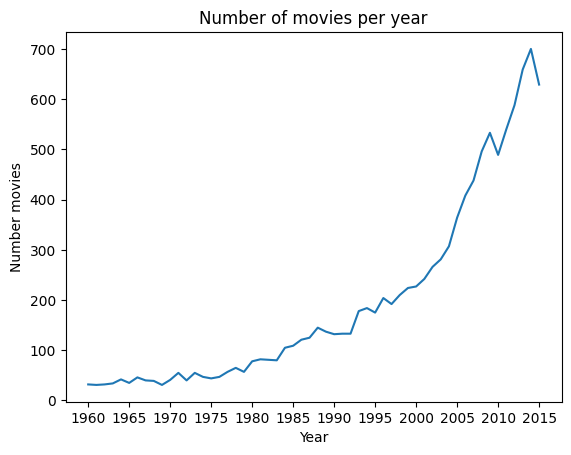

In [15]:
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))
plt.title('Number of movies per year')
plt.xlabel('Year')
plt.ylabel('Number movies')

plt.show()

The highest movie releases are in year 2014 (700) followed by 2013 (659) and 2015 (629).

### Research Question 2  What are the 10 top rated movies

In [16]:
# sort top10 vote average movies
top_10 = df.sort_values('vote_average', ascending=False).head(10)
title = top_10['original_title']
average = top_10['vote_average']

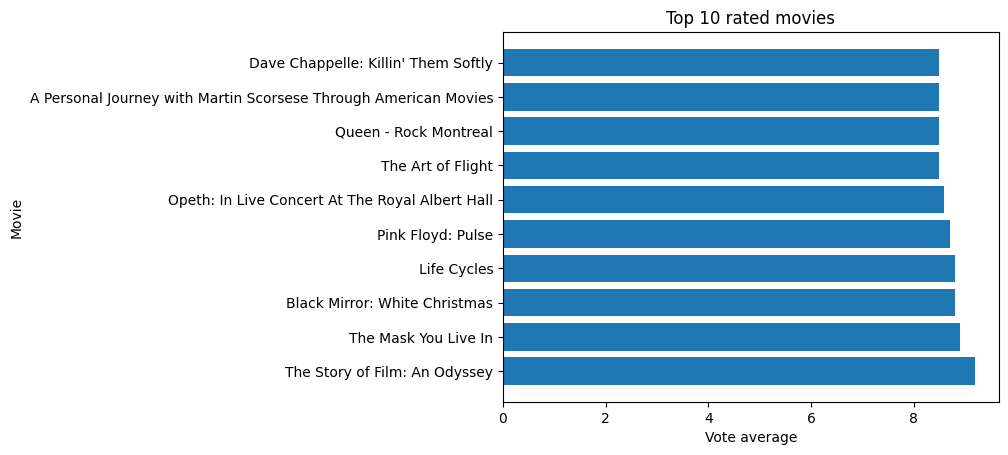

In [17]:
plt.barh(title, average)
plt.title('Top 10 rated movies')
plt.ylabel('Movie')
plt.xlabel('Vote average')
plt.show()

### Research Question 3  What are the 10 bad rated movies

In [18]:
# sort bad10 vote average movies
bad_10 = df.sort_values('vote_average', ascending=True).head(10)
title = bad_10['original_title']
average = bad_10['vote_average']

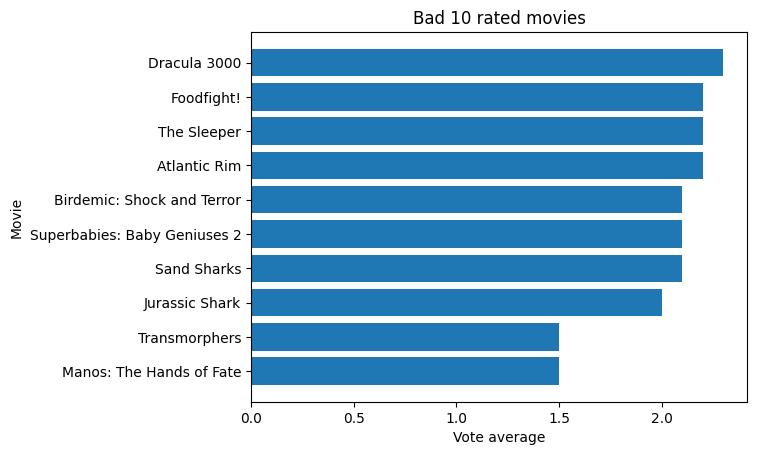

In [19]:
plt.barh(title, average)
plt.title('Bad 10 rated movies')
plt.ylabel('Movie')
plt.xlabel('Vote average')
plt.show()

In [20]:
### Research Question 3  Revenue over the years

In [21]:
#Used the filtered data where 0 removed
revenues_yearly_filtered = df_filtered.groupby('release_year')['revenue'].mean()
revenues_yearly = df.groupby('release_year')['revenue'].mean()

Text(0.5, 1.0, 'Revenue unfiltered data')

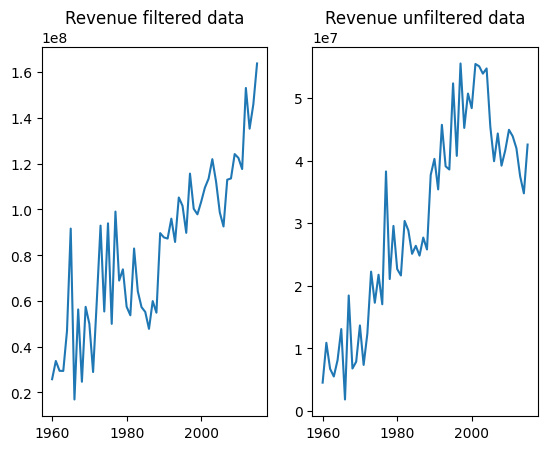

In [22]:
plt.subplot(121) 
plt.plot(revenues_yearly_filtered)
plt.title('Revenue filtered data')
#plt.show()
plt.subplot(122)
plt.plot(revenues_yearly)
plt.title('Revenue unfiltered data')


You can see that revenue were subject to strong fluctuations between 1960 and 1980. From 1990, revenue rose steadily from year to year with a slight dip 2008 

### Research Question 4 Does Popularity Depends On Profit?

In [23]:
df_filtered['Profit'] = df_filtered['revenue'] - df_filtered['budget']

y = df_filtered['Profit']
x = df_filtered['popularity']
correlation = y.corr(x)
correlation 

0.5962013674920571

Text(0, 0.5, 'profit')

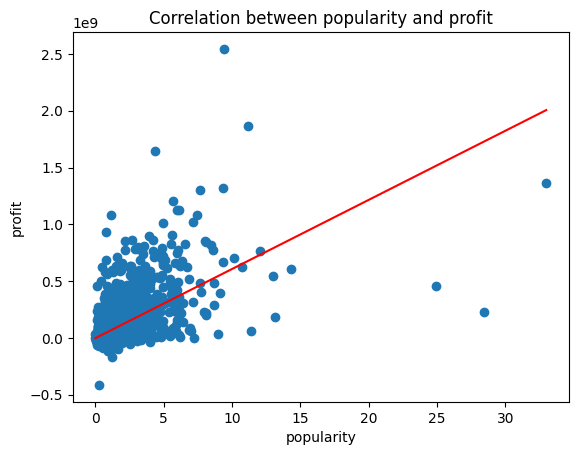

In [24]:
# adds the title
plt.title('Correlation between popularity and profit')
 
# plot the data
plt.scatter(x, y)
 
# fits the best fitting line to the data
plt.plot(np.unique(x), 
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
 
# Labelling axes
plt.xlabel('popularity')
plt.ylabel('profit')

It looks like that the data have a positive correlation between popularity and profit. The correlation is 0.5962013674920571. So the movie with the highest popularity should have a higher profit.

<a id='conclusions'></a>
## Conclusions

- Maximum Number Of Movies Release in year 2014.
- Top rated Movie "The Story of Film: An Odyssey"
- Bad rated Movie "Manos and Transmorphers"
- You can see that revenue were subject to strong fluctuations between 1960 and 1980. From 1990, revenue rose steadily from year to year with a slight dip 2008 


The TMDB data is very comprehensive for performing many more analyses. However, due to the fact that some data contain 0 values, the adjusted revenue chart is of course not completely correct. The change between filtered and unfiltered data (filtered: 3854; unfiltered: 10865) is huge so that the results may not fully representent.

In [25]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 883474 bytes to Investigate_a_Dataset.html
